## Задание 2 (3 балла)

На примере нормального р-я, равномерного р-я и р-я Лапласа покажите, как от величины коэффициента эксцесса зависит вероятность попадания в "хвост". 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import scipy.stats as st

<b>1. Постройте графики плотностей распределений (друг на друге)

In [2]:
x = [i/100 - 3 for i in range(600)]
norm_d = [st.norm.pdf(i) for i in x]
lapl_d = [st.laplace.pdf(i, scale=1/np.sqrt(2)) for i in x]
unif_d = [st.uniform.pdf(i, loc = -np.sqrt(12)/2, scale = np.sqrt(12)) for i in x]

<AxesSubplot:>

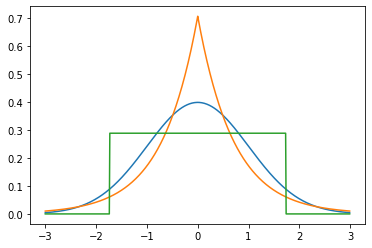

In [3]:
sns.lineplot(x=x, y=norm_d)
sns.lineplot(x=x, y=lapl_d)
sns.lineplot(x=x, y=unif_d)

<b>2. Посчитайте коэффициенты эксцесса для этих распределений 

Коэффициент эксцесса равномерного распределения:

In [4]:
st.uniform.stats(moments='k', loc = -np.sqrt(12)/2, scale = np.sqrt(12))

array(-1.2)

Коэффициент эксцесса нормального распределения:

In [5]:
st.norm.stats(moments='k')

array(0.)

Коэффициент эксцесса распределения Лапласа:

In [6]:
st.laplace.stats(moments='k', scale=1/np.sqrt(2))

array(3.)

<b>3. Сравните вероятности попадания в "хвост" для этих распределений (подсказка, это проще всего сделать с помощью функции распределения)

In [7]:
x = [i/100 - 3 for i in range(300)]

norm_d = [st.norm.cdf(i) for i in x]
lapl_d = [st.laplace.cdf(i, scale=1/np.sqrt(2)) for i in x]
unif_d = [st.uniform.cdf(i, loc = -np.sqrt(12)/2, scale = np.sqrt(12)) for i in x]

<AxesSubplot:>

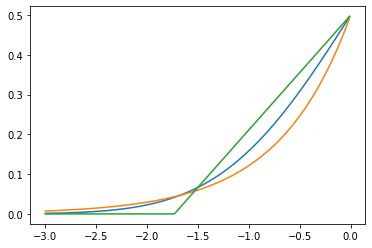

In [8]:
sns.lineplot(x=x, y=norm_d)
sns.lineplot(x=x, y=lapl_d)
sns.lineplot(x=x, y=unif_d)

В качестве хвоста возьмем $x<-2$

Тогда вероятность попасть в него: $F(-2)$, где $F$ - функция распределения

Вероятность попасть в левый хвост равномерного распределения:

In [9]:
unif_d[x.index(-2)]

0.0

Вероятность попасть в левый хвост нормального распределения:

In [10]:
norm_d[x.index(-2)]

0.022750131948179195

Вероятность попасть в левый хвост распределения Лапласа:

In [11]:
lapl_d[x.index(-2)]

0.029552873280978113

Итак:

|  | равномерное р-е | нормальное р-е | р-е Лапласа |
| --- | --- | --- | --- |
| коэффициент эксцесса | -1.2 | 0. | 3. |
| вероятность попасть в хвост | 0 | 0.023 | 0.03 |

ВЫВОД: чем больше коэффициент эксцесса, тем больше вероятность попасть в хвост распределения